# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

Objective:
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.
Dataset:
Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.


# Tasks:

# 1. Data Exploration and Preprocessing:

In [1]:
#import the pakage
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv('adult_with_headers.csv')

In [5]:
#Df information
print('Dataset Information:')
print(df.info())

# Summary statistics
print('\nSummary Statistics:')
print(df.describe())

# Missing values
print('\nMissing Values:')
print(df.isnull().sum())

# Data types
print('\nData Types:')
print(df.dtypes)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Summary Statistics:
                age        fnlwgt  education_n

In [7]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


* There are no missing values in the dataset. The data types are a mix of integers and strings.

* Handling missing values is not necessary in this case.

# **Columns to Remove**

* Relationship (minimal impact on income)
* Native-country (not a direct indicator of income)

In [12]:
## Remove unnecessary columns
df.drop(['relationship', 'native_country'],axis=1,inplace=True)

In [14]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,<=50K


In [16]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'income'],
      dtype='object')

In [18]:
df.shape

(32561, 13)

In [20]:
df.size

423293

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  income          32561 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.2+ MB


In [24]:
#Separating Numerical & Categorical  columns
num_col= [i for i in df.columns if df[i].dtype!='O']
num_col

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [26]:
#CATEGORICAL COLUMNS
cat_col= [i for i in df.columns if df[i].dtype=='O']

# **Scaling Techniques**

* **Standard Scaling:** Use when features have different units or scales. Normalizes features to have zero mean and unit variance

* **Min-Max Scaling:** Use when you want to preserve the original distribution of features and scale them to a common range (e.g., [0, 1]).

In [30]:
#i am applying Standard Scaling and Min-Max Scaling to numerical features
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard Scaling
scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])

# Min-Max Scaling
scaler = MinMaxScaler()
df[num_col] = scaler.fit_transform(df[num_col])

In [31]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,White,Male,0.021740,0.0,0.397959,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,White,Male,0.000000,0.0,0.122449,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,White,Male,0.000000,0.0,0.397959,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Black,Male,0.000000,0.0,0.397959,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Black,Female,0.000000,0.0,0.397959,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,White,Female,0.000000,0.0,0.377551,<=50K
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,White,Male,0.000000,0.0,0.397959,>50K
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,White,Female,0.000000,0.0,0.397959,<=50K
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,White,Male,0.000000,0.0,0.193878,<=50K


# 2. Encoding Techniques

In [35]:
#import a new pakage

In [37]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [39]:
# cat_col is a list of categorical column names
# One-Hot Encoding for categorical variables with less than 5 categories
one_hot_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)  # sparse=False for compatibility
one_hot_cols = [col for col in cat_col if df[col].nunique() < 5]
one_hot_features = one_hot_encoder.fit_transform(df[one_hot_cols])
df = pd.concat([df, pd.DataFrame(one_hot_features, columns=one_hot_encoder.get_feature_names_out(one_hot_cols))], axis=1)

# Label Encoding for categorical variables with more than 5 categories
label_encoder = LabelEncoder()
label_cols = [col for col in cat_col if df[col].nunique() >= 5]
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])
    cat_cols_more_than_5 = [col for col in cat_col if df[col].nunique() < 5]

# Print the result
print(cat_cols_more_than_5)

['sex', 'income']


In [41]:
cat_cols_more_than_5 = [col for col in cat_col if df[col].nunique() > 5]

# Print the result
print(cat_cols_more_than_5)

['workclass', 'education', 'marital_status', 'occupation']


In [43]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,income,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.301370,7,0.044302,9,0.800000,4,1,4,Male,0.021740,0.0,0.397959,<=50K,0.0,1.0,1.0,0.0
1,0.452055,6,0.048238,9,0.800000,2,4,4,Male,0.000000,0.0,0.122449,<=50K,0.0,1.0,1.0,0.0
2,0.287671,4,0.138113,11,0.533333,0,6,4,Male,0.000000,0.0,0.397959,<=50K,0.0,1.0,1.0,0.0
3,0.493151,4,0.151068,1,0.400000,2,6,2,Male,0.000000,0.0,0.397959,<=50K,0.0,1.0,1.0,0.0
4,0.150685,4,0.221488,9,0.800000,2,10,2,Female,0.000000,0.0,0.397959,<=50K,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,4,0.166404,7,0.733333,2,13,4,Female,0.000000,0.0,0.377551,<=50K,1.0,0.0,1.0,0.0
32557,0.315068,4,0.096500,11,0.533333,2,7,4,Male,0.000000,0.0,0.397959,>50K,0.0,1.0,0.0,1.0
32558,0.561644,4,0.094827,11,0.533333,6,1,4,Female,0.000000,0.0,0.397959,<=50K,1.0,0.0,1.0,0.0
32559,0.068493,4,0.128499,11,0.533333,4,1,4,Male,0.000000,0.0,0.193878,<=50K,0.0,1.0,1.0,0.0


# **One-Hot Encoding vs Label Encoding**


* **One-Hot Encoding** preserves information, has no implicit ordering, and is easy to implement, but increases dimensionality and creates sparse matrices.

* **Label Encoding** reduces dimensionality, is fast and efficient, and easy to implement, but implies ordering or hierarchy and can be misleading if not done correctly.

In [47]:
#Dropping Original columns of sex and income
df.drop(['sex','income'],axis=1,inplace=True)

In [49]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,capital_gain,capital_loss,hours_per_week,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.301370,7,0.044302,9,0.800000,4,1,4,0.021740,0.0,0.397959,0.0,1.0,1.0,0.0
1,0.452055,6,0.048238,9,0.800000,2,4,4,0.000000,0.0,0.122449,0.0,1.0,1.0,0.0
2,0.287671,4,0.138113,11,0.533333,0,6,4,0.000000,0.0,0.397959,0.0,1.0,1.0,0.0
3,0.493151,4,0.151068,1,0.400000,2,6,2,0.000000,0.0,0.397959,0.0,1.0,1.0,0.0
4,0.150685,4,0.221488,9,0.800000,2,10,2,0.000000,0.0,0.397959,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,4,0.166404,7,0.733333,2,13,4,0.000000,0.0,0.377551,1.0,0.0,1.0,0.0
32557,0.315068,4,0.096500,11,0.533333,2,7,4,0.000000,0.0,0.397959,0.0,1.0,0.0,1.0
32558,0.561644,4,0.094827,11,0.533333,6,1,4,0.000000,0.0,0.397959,1.0,0.0,1.0,0.0
32559,0.068493,4,0.128499,11,0.533333,4,1,4,0.000000,0.0,0.193878,0.0,1.0,1.0,0.0


# 3.Feature Engineering

In [52]:
#create two new features that could be beneficial for the model.
#Total Capital: This feature combines (Capital-gain) and (Capital-loss) to represent the total capital amount.
#Work Experience: This feature calculates the work experience based on the (Age) and (Education) features.
df['Total Capital'] = df['capital_gain'] + df['capital_loss']
df['Work Experience'] = df['age'] + df['education_num']

In [54]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,capital_gain,capital_loss,hours_per_week,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,Total Capital,Work Experience
0,0.301370,7,0.044302,9,0.800000,4,1,4,0.021740,0.0,0.397959,0.0,1.0,1.0,0.0,0.021740,1.101370
1,0.452055,6,0.048238,9,0.800000,2,4,4,0.000000,0.0,0.122449,0.0,1.0,1.0,0.0,0.000000,1.252055
2,0.287671,4,0.138113,11,0.533333,0,6,4,0.000000,0.0,0.397959,0.0,1.0,1.0,0.0,0.000000,0.821005
3,0.493151,4,0.151068,1,0.400000,2,6,2,0.000000,0.0,0.397959,0.0,1.0,1.0,0.0,0.000000,0.893151
4,0.150685,4,0.221488,9,0.800000,2,10,2,0.000000,0.0,0.397959,1.0,0.0,1.0,0.0,0.000000,0.950685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,4,0.166404,7,0.733333,2,13,4,0.000000,0.0,0.377551,1.0,0.0,1.0,0.0,0.000000,0.870320
32557,0.315068,4,0.096500,11,0.533333,2,7,4,0.000000,0.0,0.397959,0.0,1.0,0.0,1.0,0.000000,0.848402
32558,0.561644,4,0.094827,11,0.533333,6,1,4,0.000000,0.0,0.397959,1.0,0.0,1.0,0.0,0.000000,1.094977
32559,0.068493,4,0.128499,11,0.533333,4,1,4,0.000000,0.0,0.193878,0.0,1.0,1.0,0.0,0.000000,0.601826


In [56]:
#The Hours-per-week feature is skewed, so we'll apply a log transformation to normalize it.
import numpy as np
df['Log_Hours-per-week'] = np.log1p(df['hours_per_week'])

In [58]:
#Removing Original hours_per_week column
df.drop(['hours_per_week'],axis=1,inplace=True)

In [60]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,capital_gain,capital_loss,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,Total Capital,Work Experience,Log_Hours-per-week
0,0.301370,7,0.044302,9,0.800000,4,1,4,0.021740,0.0,0.0,1.0,1.0,0.0,0.021740,1.101370,0.335013
1,0.452055,6,0.048238,9,0.800000,2,4,4,0.000000,0.0,0.0,1.0,1.0,0.0,0.000000,1.252055,0.115513
2,0.287671,4,0.138113,11,0.533333,0,6,4,0.000000,0.0,0.0,1.0,1.0,0.0,0.000000,0.821005,0.335013
3,0.493151,4,0.151068,1,0.400000,2,6,2,0.000000,0.0,0.0,1.0,1.0,0.0,0.000000,0.893151,0.335013
4,0.150685,4,0.221488,9,0.800000,2,10,2,0.000000,0.0,1.0,0.0,1.0,0.0,0.000000,0.950685,0.335013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,4,0.166404,7,0.733333,2,13,4,0.000000,0.0,1.0,0.0,1.0,0.0,0.000000,0.870320,0.320307
32557,0.315068,4,0.096500,11,0.533333,2,7,4,0.000000,0.0,0.0,1.0,0.0,1.0,0.000000,0.848402,0.335013
32558,0.561644,4,0.094827,11,0.533333,6,1,4,0.000000,0.0,1.0,0.0,1.0,0.0,0.000000,1.094977,0.335013
32559,0.068493,4,0.128499,11,0.533333,4,1,4,0.000000,0.0,0.0,1.0,1.0,0.0,0.000000,0.601826,0.177206


# 4.Feature Selection

**Isolation Forest for Outlier Detection**

**Outliers** can significantly affect model performance by skewing the results or reducing the model's accuracy. To identify and remove outliers, we can use the Isolation Forest algorithm.

In [64]:
#import the pakage

In [66]:
from sklearn.ensemble import IsolationForest

In [68]:
# Create an Isolation Forest object
isolation_forest = IsolationForest(contamination=0.1)

# Fit the Isolation Forest to the data
isolation_forest.fit(df)

# Predict outliers
outliers = isolation_forest.predict(df)

# Remove outliers from the dataset
df = df[outliers == 1]

In [70]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,race,capital_gain,capital_loss,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,Total Capital,Work Experience,Log_Hours-per-week
0,0.301370,7,0.044302,9,0.800000,4,1,4,0.02174,0.0,0.0,1.0,1.0,0.0,0.02174,1.101370,0.335013
1,0.452055,6,0.048238,9,0.800000,2,4,4,0.00000,0.0,0.0,1.0,1.0,0.0,0.00000,1.252055,0.115513
2,0.287671,4,0.138113,11,0.533333,0,6,4,0.00000,0.0,0.0,1.0,1.0,0.0,0.00000,0.821005,0.335013
3,0.493151,4,0.151068,1,0.400000,2,6,2,0.00000,0.0,0.0,1.0,1.0,0.0,0.00000,0.893151,0.335013
4,0.150685,4,0.221488,9,0.800000,2,10,2,0.00000,0.0,1.0,0.0,1.0,0.0,0.00000,0.950685,0.335013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.068493,4,0.202298,15,0.600000,4,11,4,0.00000,0.0,0.0,1.0,1.0,0.0,0.00000,0.668493,0.335013
32556,0.136986,4,0.166404,7,0.733333,2,13,4,0.00000,0.0,1.0,0.0,1.0,0.0,0.00000,0.870320,0.320307
32557,0.315068,4,0.096500,11,0.533333,2,7,4,0.00000,0.0,0.0,1.0,0.0,1.0,0.00000,0.848402,0.335013
32558,0.561644,4,0.094827,11,0.533333,6,1,4,0.00000,0.0,1.0,0.0,1.0,0.0,0.00000,1.094977,0.335013


# **Predictive Power Score (PPS) for Feature Selection**

The **PPS** scores can help us identify the most informative features and reduce dimensionality. We can compare the PPS scores with the correlation matrix to validate the findings.

In [73]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'race', 'capital_gain', 'capital_loss',
       'sex_ Female', 'sex_ Male', 'income_ <=50K', 'income_ >50K',
       'Total Capital', 'Work Experience', 'Log_Hours-per-week'],
      dtype='object')

In [77]:
from sklearn.feature_selection import mutual_info_classif
# Define the target columns
target_cols = ['income_ <=50K', 'income_ >50K']

# Define the feature columns
feature_cols = [col for col in df.columns if col not in target_cols]

# Calculate mutual information for each feature
pps_scores_less_than_50K = [(feature, mutual_info_classif(df[[feature]], df['income_ <=50K'])[0]) for feature in feature_cols]
pps_scores_greater_than_50K = [(feature, mutual_info_classif(df[[feature]], df['income_ >50K'])[0]) for feature in feature_cols]

print("PPS scores for income_ <=50K:")
for feature, pps_score in pps_scores_less_than_50K:
    print(f"{feature}: {pps_score:.3f}")

print("\nPPS scores for income_ >50K:")
for feature, pps_score in pps_scores_greater_than_50K:
    print(f"{feature}: {pps_score:.3f}")

PPS scores for income_ <=50K:
age: 0.062
workclass: 0.014
fnlwgt: 0.034
education: 0.049
education_num: 0.051
marital_status: 0.115
occupation: 0.056
race: 0.018
capital_gain: 0.055
capital_loss: 0.011
sex_ Female: 0.042
sex_ Male: 0.041
Total Capital: 0.063
Work Experience: 0.105
Log_Hours-per-week: 0.045

PPS scores for income_ >50K:
age: 0.060
workclass: 0.013
fnlwgt: 0.032
education: 0.048
education_num: 0.053
marital_status: 0.113
occupation: 0.057
race: 0.014
capital_gain: 0.057
capital_loss: 0.009
sex_ Female: 0.037
sex_ Male: 0.041
Total Capital: 0.061
Work Experience: 0.103
Log_Hours-per-week: 0.046


In [79]:
target_cols

['income_ <=50K', 'income_ >50K']

In [81]:
feature_cols

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'race',
 'capital_gain',
 'capital_loss',
 'sex_ Female',
 'sex_ Male',
 'Total Capital',
 'Work Experience',
 'Log_Hours-per-week']

In [83]:
#Correlation
corr_matrix = df[feature_cols].corr()
print(corr_matrix)

                         age  workclass    fnlwgt  education  education_num  \
age                 1.000000   0.036949 -0.079968  -0.009552       0.022086   
workclass           0.036949   1.000000 -0.019787  -0.006424       0.031123   
fnlwgt             -0.079968  -0.019787  1.000000  -0.022458      -0.042476   
education          -0.009552  -0.006424 -0.022458   1.000000       0.331666   
education_num       0.022086   0.031123 -0.042476   0.331666       1.000000   
marital_status     -0.321909  -0.051093  0.034735  -0.025760      -0.047941   
occupation         -0.007491   0.212870  0.000106  -0.039052       0.096906   
race                0.044232   0.026461 -0.032245  -0.009946       0.026021   
capital_gain        0.085275   0.029557 -0.015567   0.018176       0.114747   
capital_loss        0.006740   0.009371 -0.016004   0.012849       0.025712   
sex_ Female        -0.110351  -0.079121 -0.026390   0.046500      -0.007955   
sex_ Male           0.110351   0.079121  0.026390  -

In [87]:
#import the visualization pakages

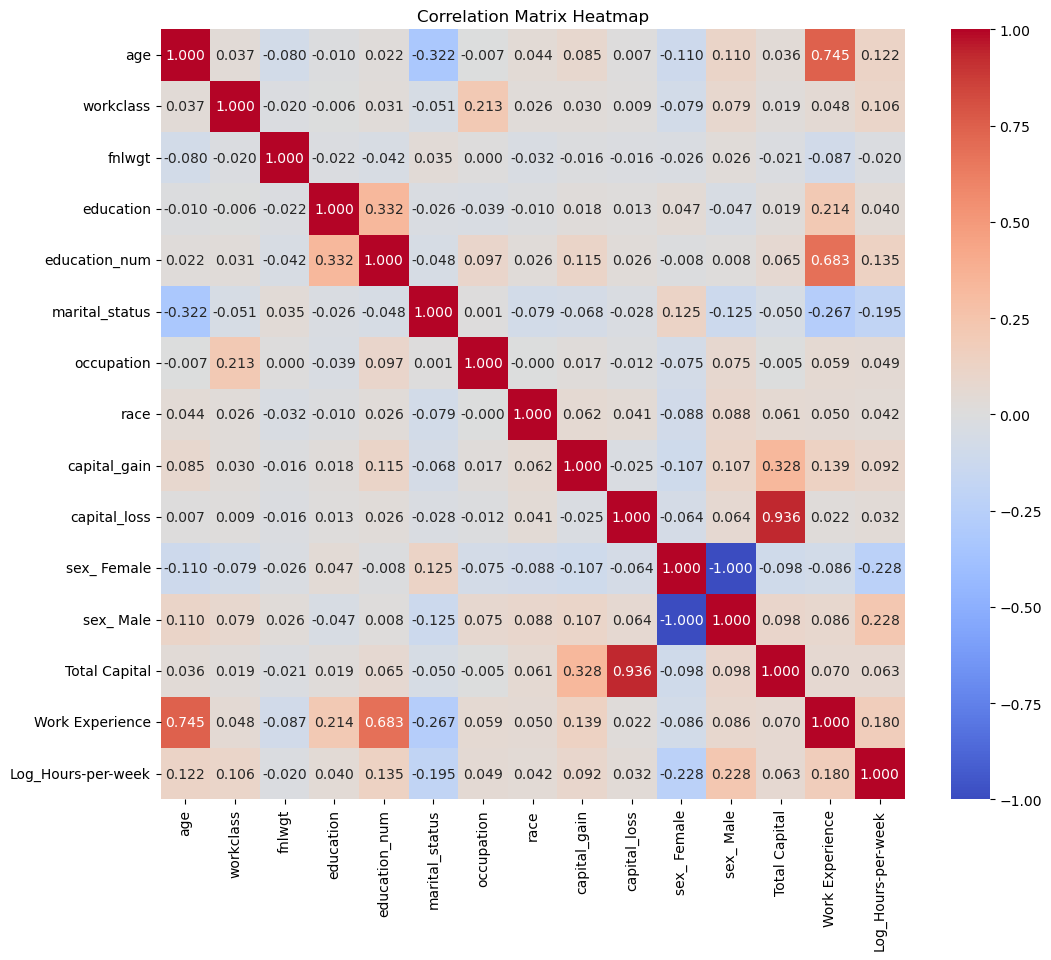

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# corr_matrix is already calculated
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
**Comparison of PPS scores and correlation matrix**